# Prep

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings; warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/elearning_info.csv', index_col=0)
df.head()

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
0,icould.com,-1,United Kingdom,0.336,1.0,0.537,0.463,0.225,0.310,0.197,0.133,0.082,0.052
1,engineeringmanagement.info,-1,United States,0.497,2.0,0.631,0.369,0.254,0.354,0.177,0.104,0.068,0.042
2,babbel.com,-1,Germany,0.539,3.0,0.513,0.487,0.239,0.288,0.178,0.132,0.094,0.068
3,management-academy.us,-1,- -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,w3schools.com,1878030,Norway,0.520,5.0,0.748,0.252,0.277,0.375,0.186,0.089,0.046,0.026


In [3]:
df.hq_country = df.hq_country.replace('- -', 'No info')

In [4]:
df = df.drop_duplicates()
df.shape

(90, 13)

In [5]:
df.visit_duration = pd.to_datetime(df.visit_duration, format='%M')

In [6]:
df = df.dropna()

In [9]:
df_brazil = df[(df.brazilian_visitors != -1) & (df.hq_country != 'Brazil')]
df_brazil.head()

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
4,w3schools.com,1878030,Norway,0.520,1900-01-01 00:05:00,0.748,0.252,0.277,0.375,0.186,0.089,0.046,0.026
26,busuu.com,250240,United Kingdom,0.436,1900-01-01 00:08:00,0.522,0.478,0.305,0.324,0.170,0.101,0.063,0.037
27,vitalsource.com,227500,United States,0.227,1900-01-01 00:14:00,0.438,0.562,0.404,0.244,0.159,0.104,0.060,0.029
44,freecodecamp.org,782040,United States,0.649,1900-01-01 00:05:00,0.758,0.242,0.268,0.379,0.186,0.090,0.049,0.028
48,gofluent.com,49040,Switzerland,0.337,1900-01-01 00:10:00,0.544,0.456,0.237,0.329,0.195,0.120,0.075,0.043


# Análise de empresas relevantes no Brasil (Brasil no top 5 acessos)

## Número de empresas

In [10]:
print(f'O Brasil está no top 5 acessos mensais de {df_brazil.shape[0]} empresas do segmento')

O Brasil está no top 5 acessos mensais de 12 empresas do segmento


## Acessos mensais

In [11]:
print(f'Número de visitantes mensais no Brasil: {df_brazil.brazilian_visitors.sum()/1_000_000:.2f}M')

Número de visitantes mensais no Brasil: 12.14M


## Países sede

In [13]:
countries = df_brazil.hq_country.value_counts()

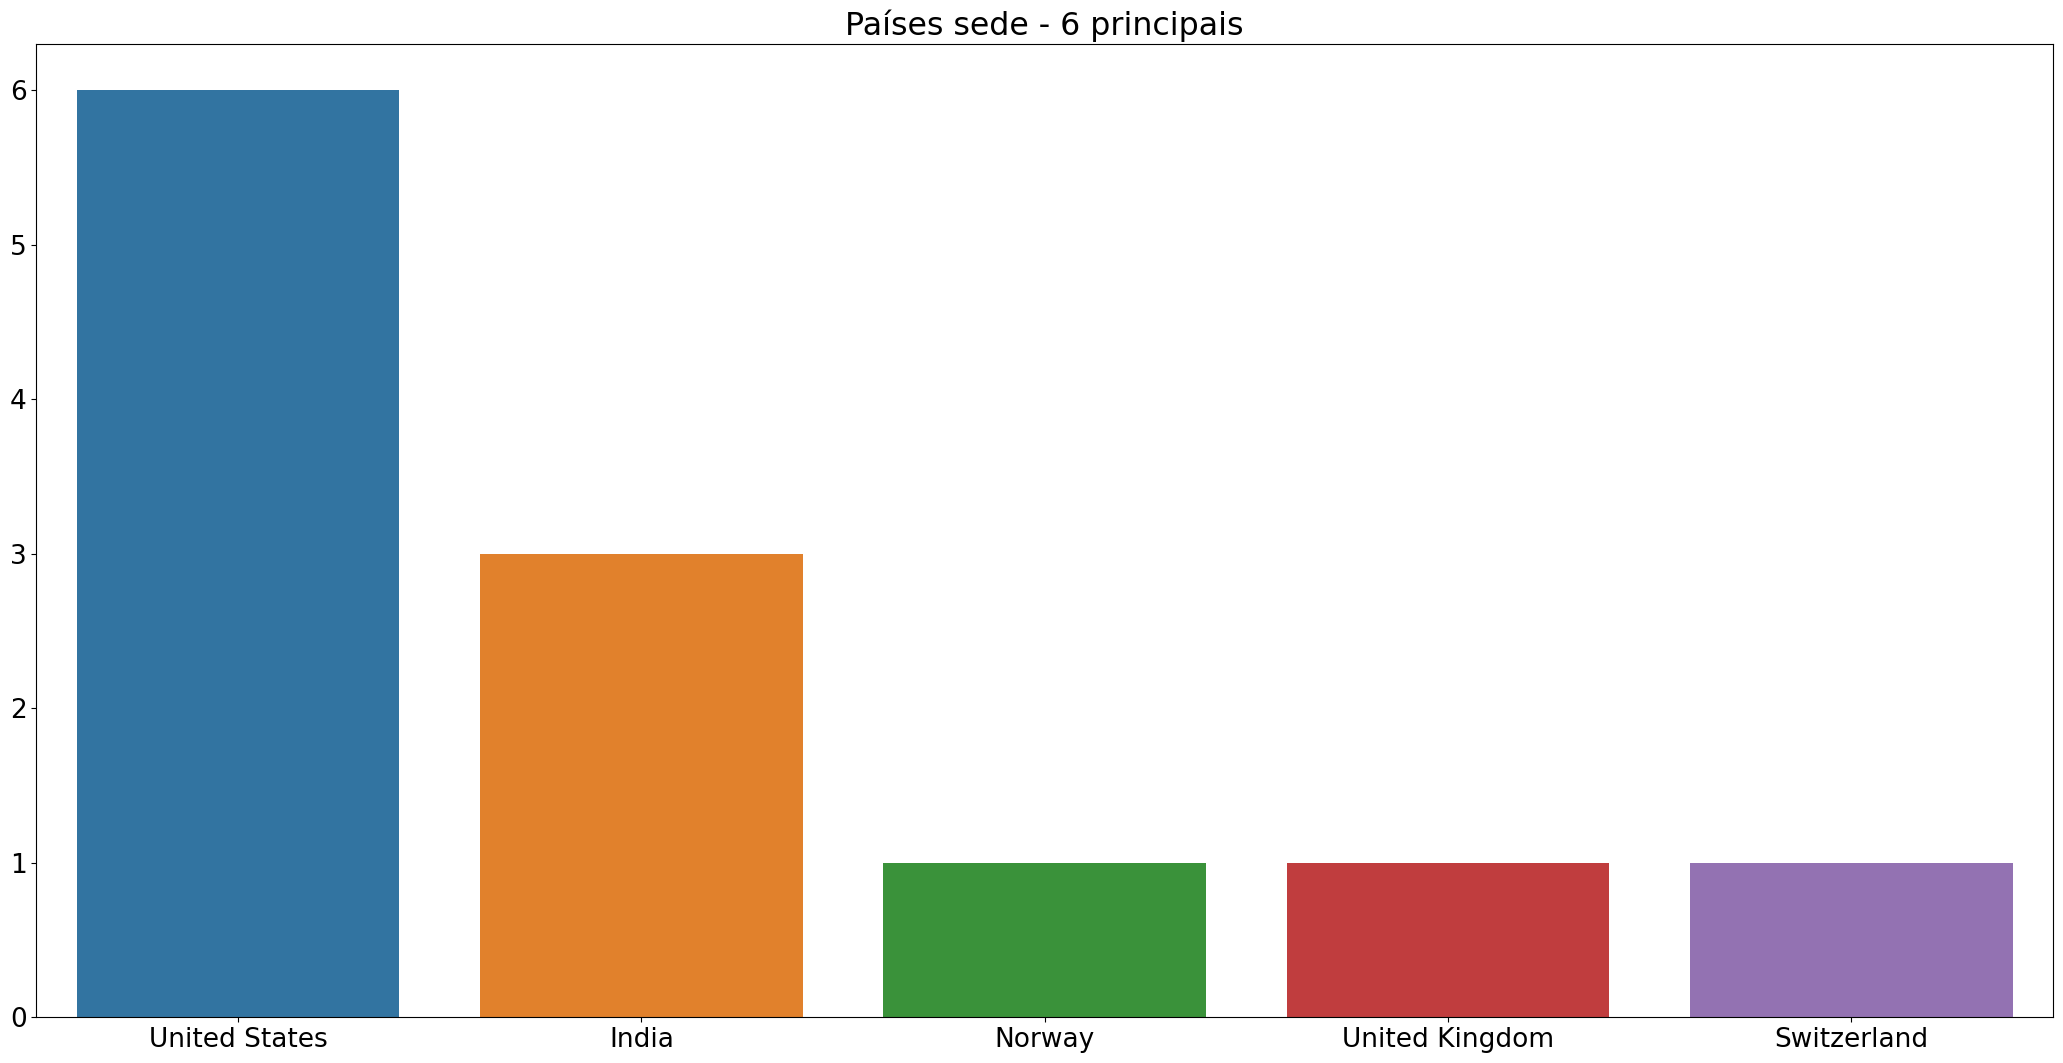

In [15]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=countries.keys(), y=countries.values)
plt.title('Países sede - 6 principais')
plt.tight_layout();

## Qualidade da visita

In [16]:
bounce = df_brazil.bounce_rate.mean() * 100
visit_dur = df_brazil.visit_duration.mean().time()

In [17]:
print(f'A taxa de bounce rate no segmento é em média {bounce:.2f}%')
print(f'O tempo médio de visita no segmento é de {visit_dur.minute}:{visit_dur.second}')

A taxa de bounce rate no segmento é em média 46.08%
O tempo médio de visita no segmento é de 7:34


## Demografia

### Sexo

In [18]:
male = round(df_brazil.male.mean(), 2)
female = 1 - male

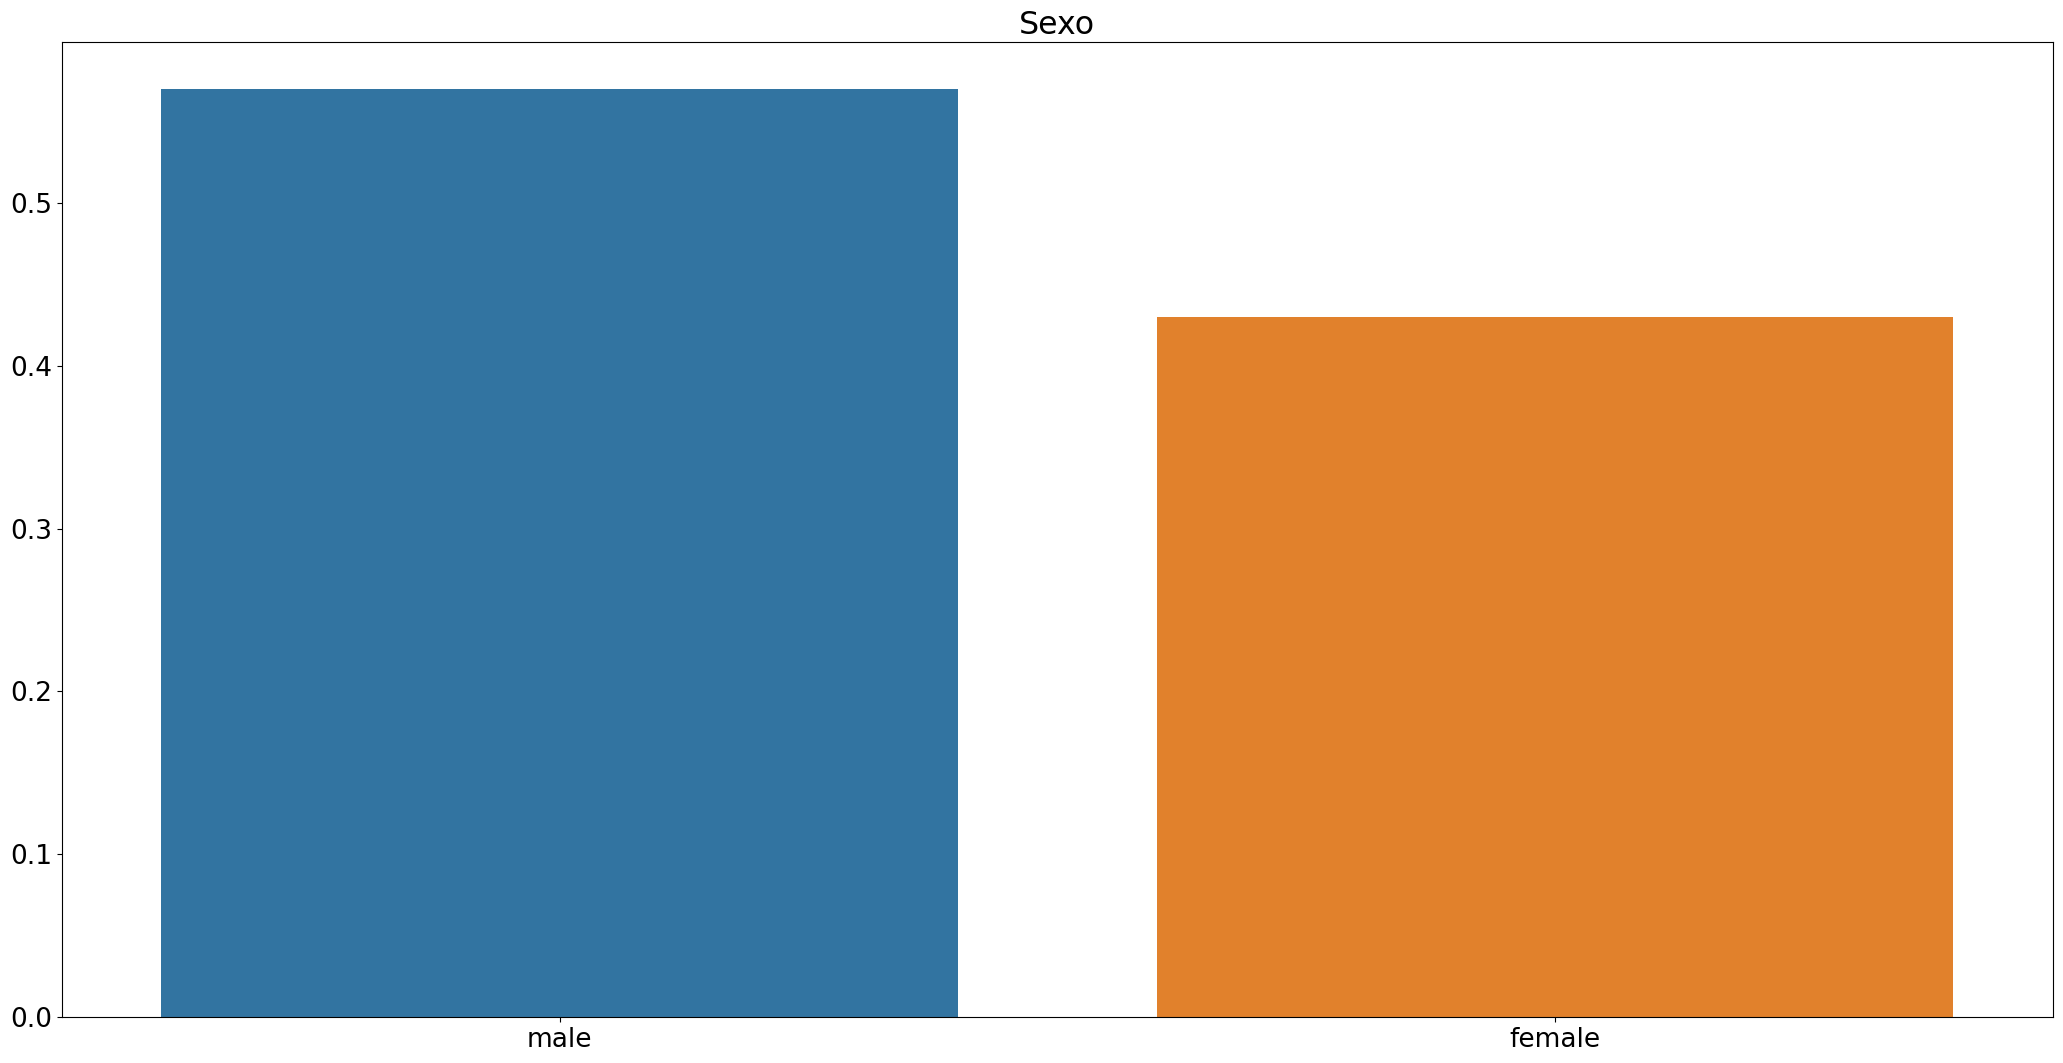

In [19]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=['male', 'female'], y=[male, female])
plt.title('Sexo')
plt.tight_layout();

### Idade

In [22]:
age_buckets = df_brazil.columns[-6:]
idade = df_brazil[age_buckets]
media_idade = idade.mean()

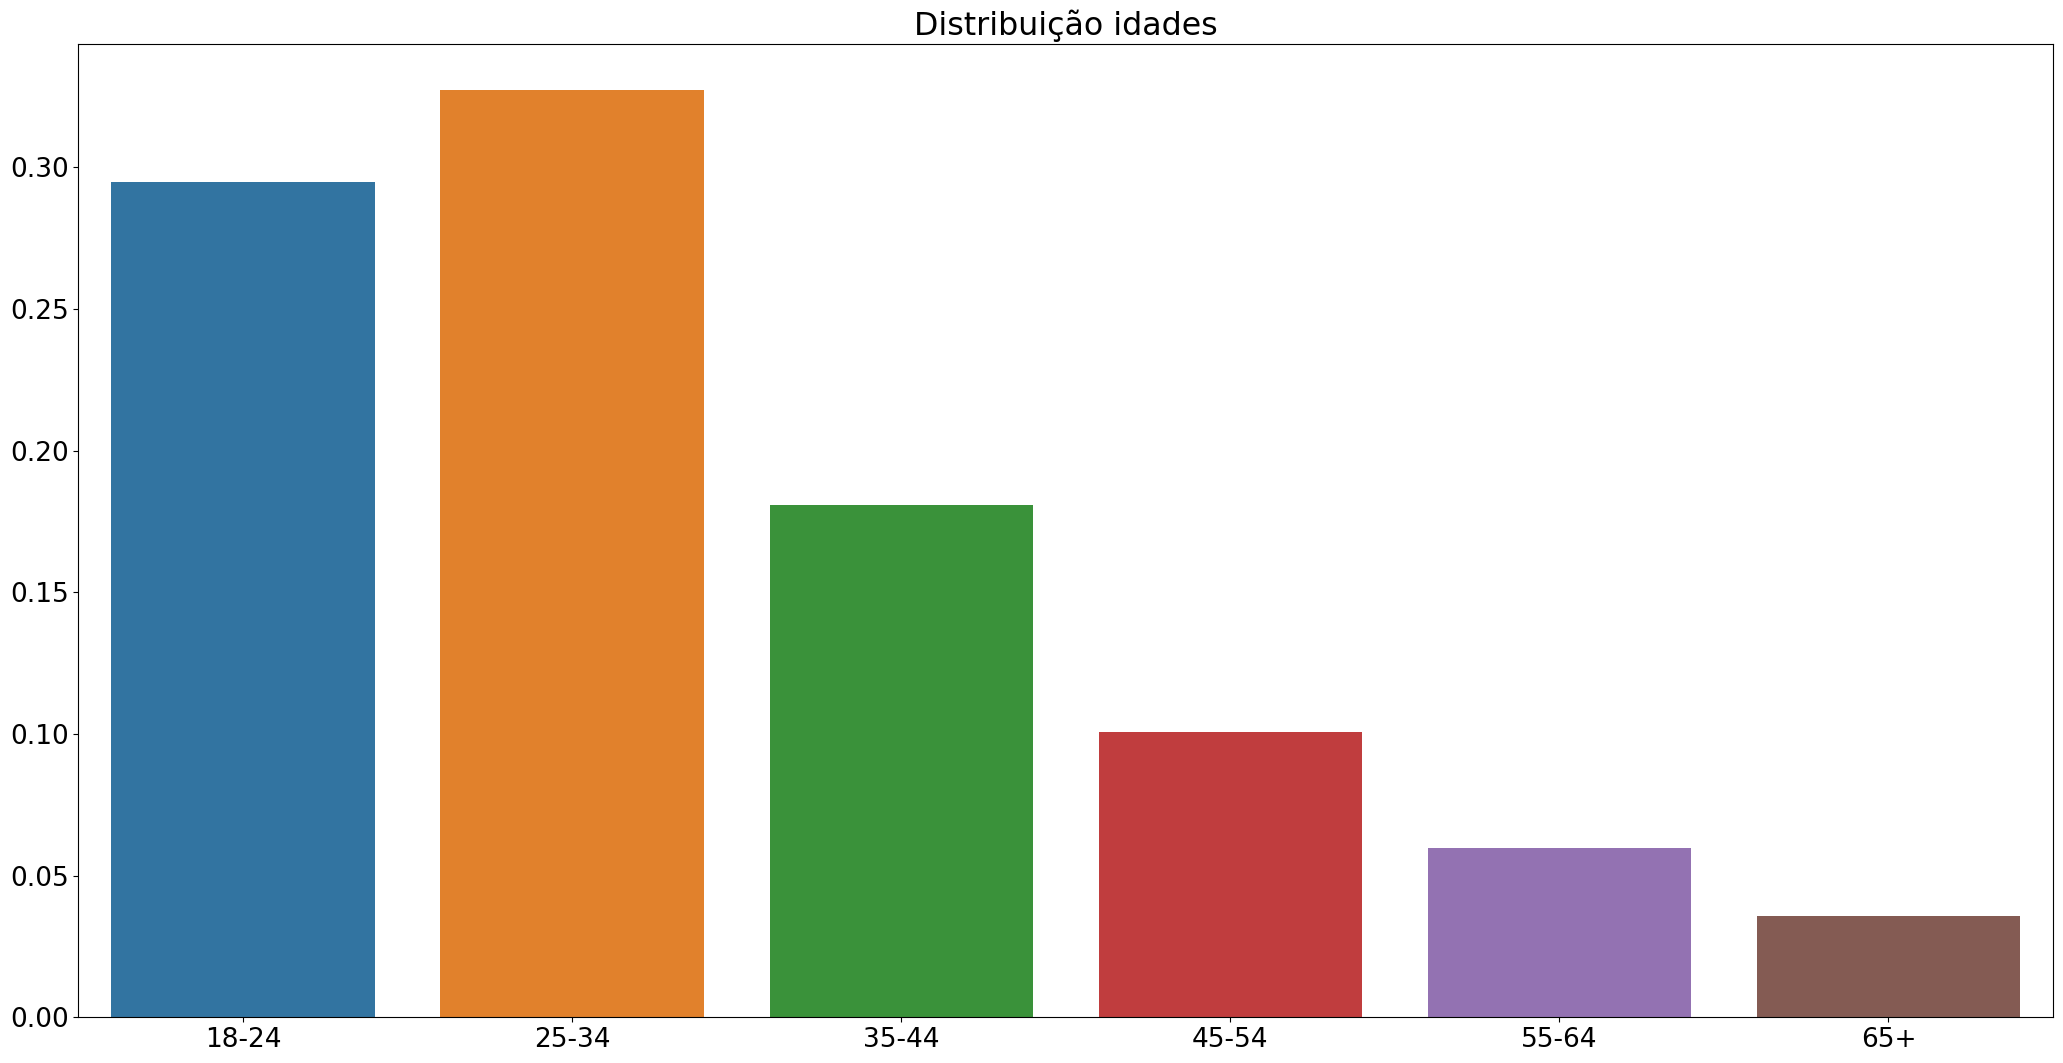

In [23]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=media_idade.index, y=media_idade.values)
plt.title('Distribuição idades')
plt.tight_layout();